Bike Store Sales Data Analysis

# Importing python libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

# Reading Data from CSV file and checking the overview of the data(head, shape, info, sample)

In [2]:
sales = pd.read_csv('sales.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1006 non-null   object
 1   Day               1006 non-null   int64 
 2   Month             1006 non-null   object
 3   Year              1006 non-null   int64 
 4   Customer_Age      1006 non-null   int64 
 5   Age_Group         1006 non-null   object
 6   Customer_Gender   1006 non-null   object
 7   Country           1006 non-null   object
 8   State             1006 non-null   object
 9   Product_Category  1006 non-null   object
 10  Sub_Category      1006 non-null   object
 11  Product           1006 non-null   object
 12  Order_Quantity    1006 non-null   int64 
 13  Unit_Cost         1006 non-null   int64 
 14  Unit_Price        1006 non-null   int64 
 15  Profit            1006 non-null   int64 
 16  Cost              1006 non-null   int64 
 17  Revenue       

In [4]:
sales.head(3)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401


In [5]:
sales.shape

(1006, 18)

In [6]:
sales.sample

<bound method NDFrame.sample of             Date  Day     Month  Year  Customer_Age       Age_Group  \
0     2013-11-26   26  November  2013            19     Youth (<25)   
1     2015-11-26   26  November  2015            19     Youth (<25)   
2     2014-03-23   23     March  2014            49  Adults (35-64)   
3     2016-03-23   23     March  2016            49  Adults (35-64)   
4     2014-05-15   15       May  2014            47  Adults (35-64)   
...          ...  ...       ...   ...           ...             ...   
1001  2016-07-20   20      July  2016            51  Adults (35-64)   
1002  2013-10-20   20   October  2013            45  Adults (35-64)   
1003  2015-10-20   20   October  2015            45  Adults (35-64)   
1004  2013-12-23   23  December  2013            35  Adults (35-64)   
1005  2015-12-23   23  December  2015            35  Adults (35-64)   

     Customer_Gender        Country             State Product_Category  \
0                  M         Canada  Brit

# Question 1: What is the mean of Custmer_Age?

In [7]:
sales['Customer_Age'].mean()


37.314115308151095

<Axes: ylabel='Density'>

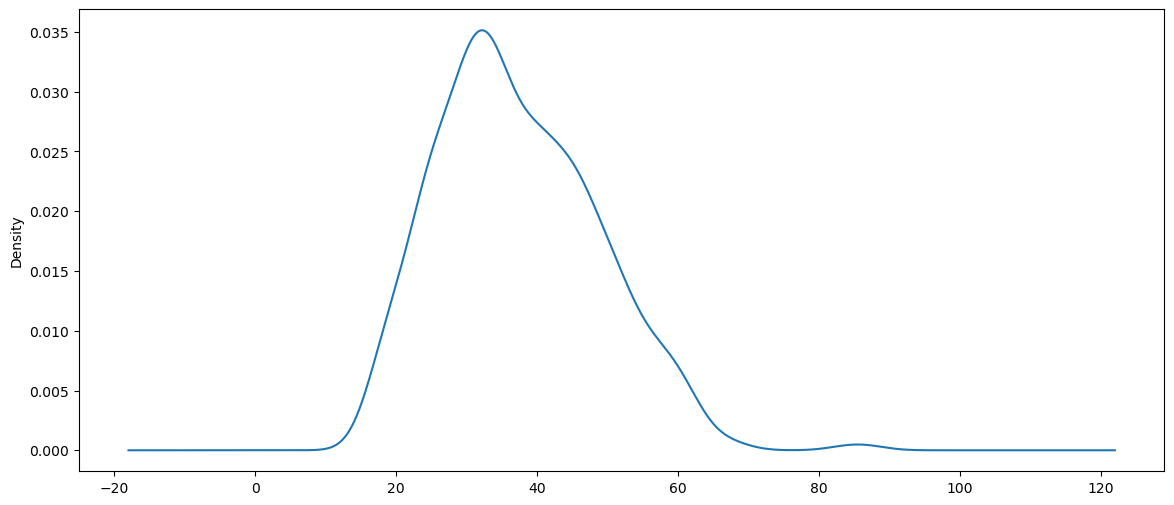

In [8]:
sales['Customer_Age'].plot(kind='kde', figsize=(14, 6))

<Axes: >

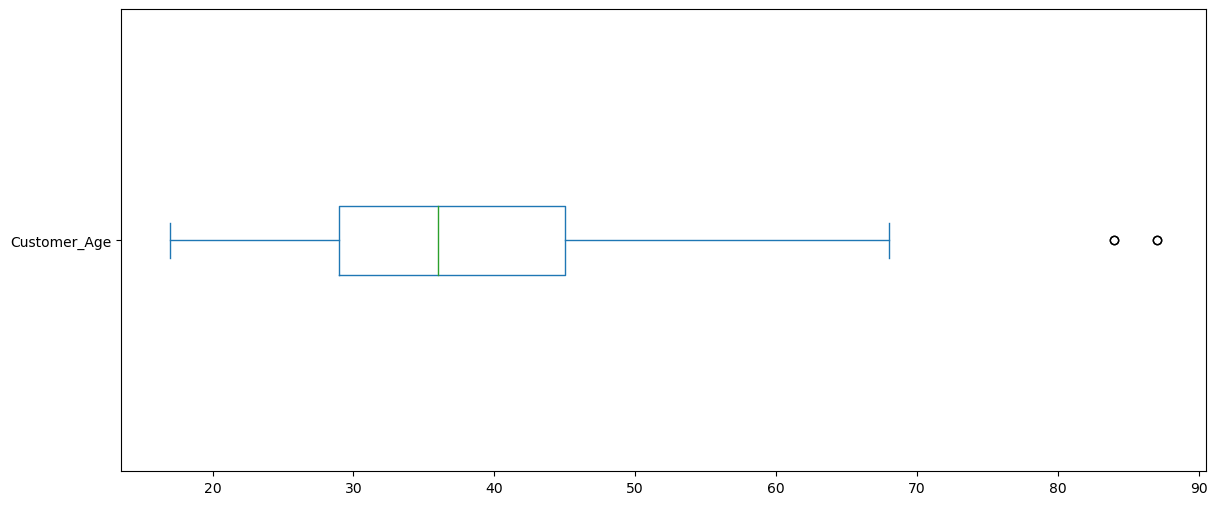

In [9]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14, 6))

# Qustion 2 is: What's the mean of Order_Quantity?

In [10]:
sales['Order_Quantity'].mean()

6.8717693836978135

<Axes: ylabel='Frequency'>

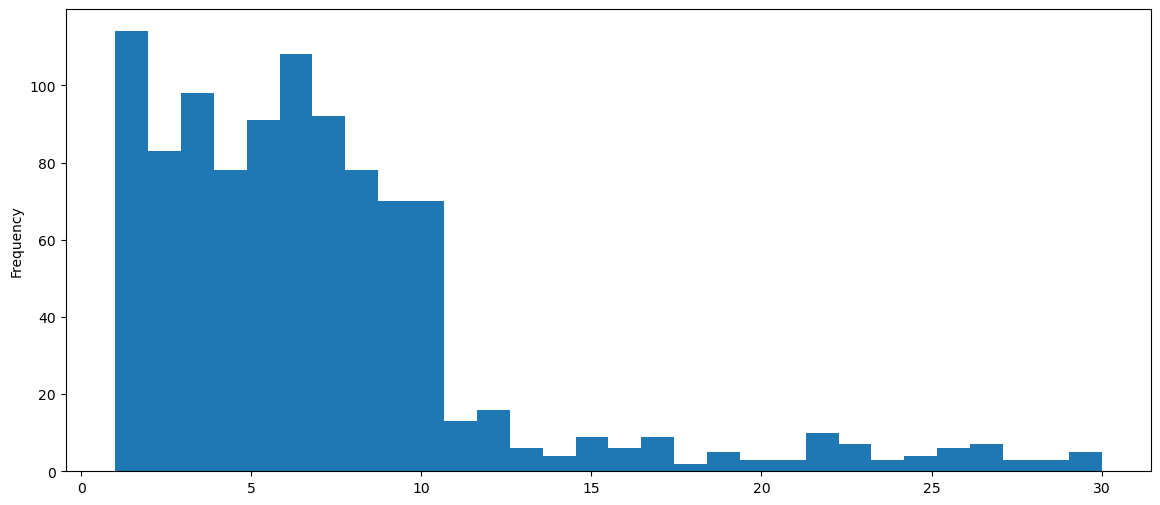

In [11]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14, 6))

<Axes: >

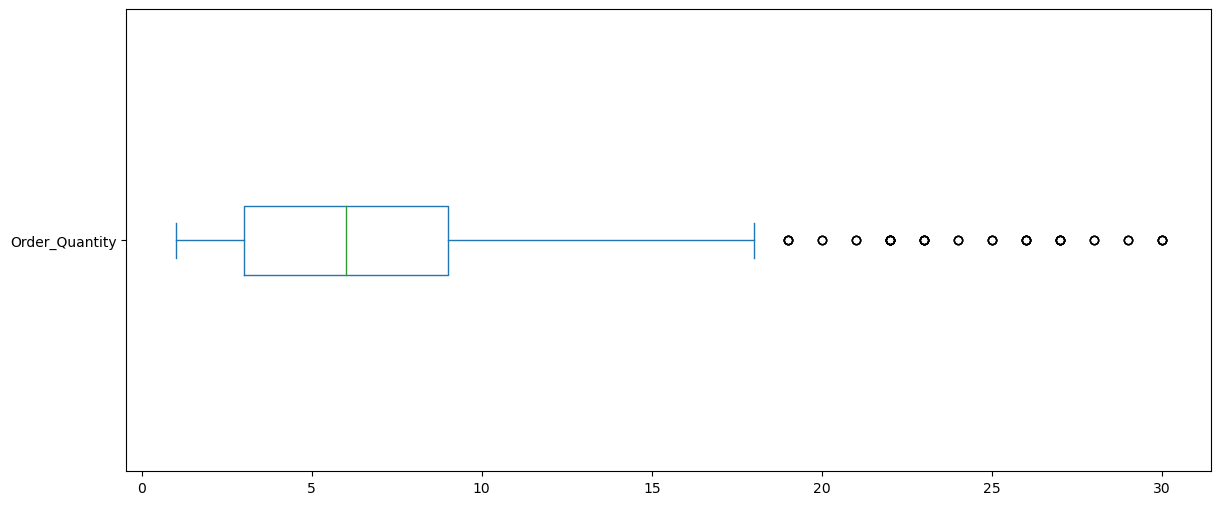

In [12]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14, 6))

# Question 3 is: How many sales per month do we have?

In [13]:
sales['Month'].value_counts()

Month
May          120
September    100
December      96
November      90
August        90
October       88
April         82
March         78
June          76
July          68
February      64
January       54
Name: count, dtype: int64

# Question 3

<Axes: xlabel='Month'>

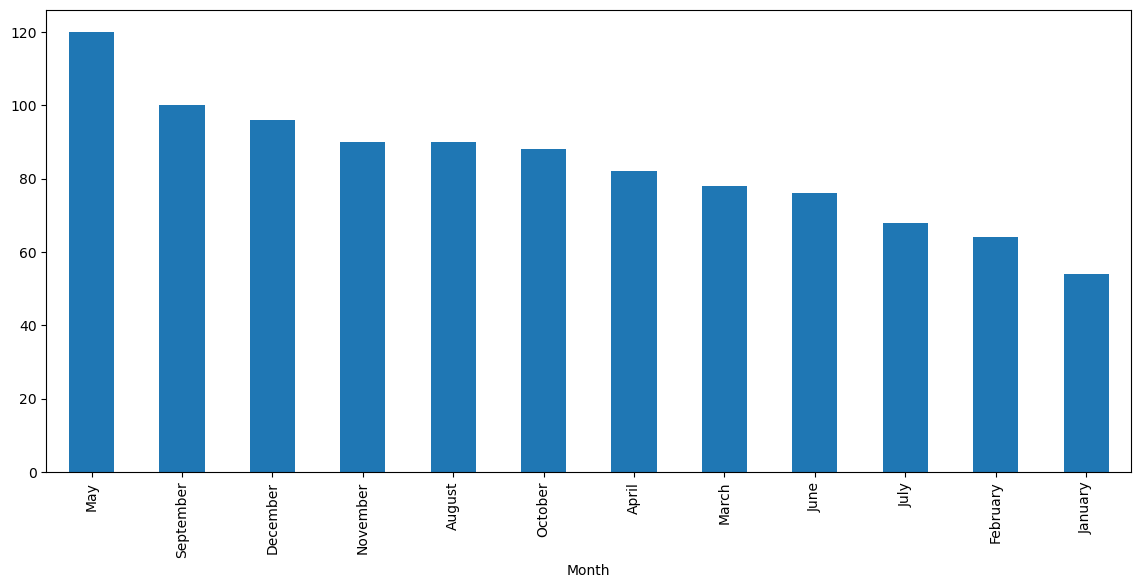

In [14]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14, 6))

# The question 4: What country has the most sales "Quantity of Sales"?

In [15]:
sales['Country'].value_counts().head(3)

Country
United States    380
Australia        198
Canada           150
Name: count, dtype: int64

In [16]:
sales['Country'].value_counts()

Country
United States     380
Australia         198
Canada            150
United Kingdom    110
Germany            84
France             84
Name: count, dtype: int64

<Axes: xlabel='Country'>

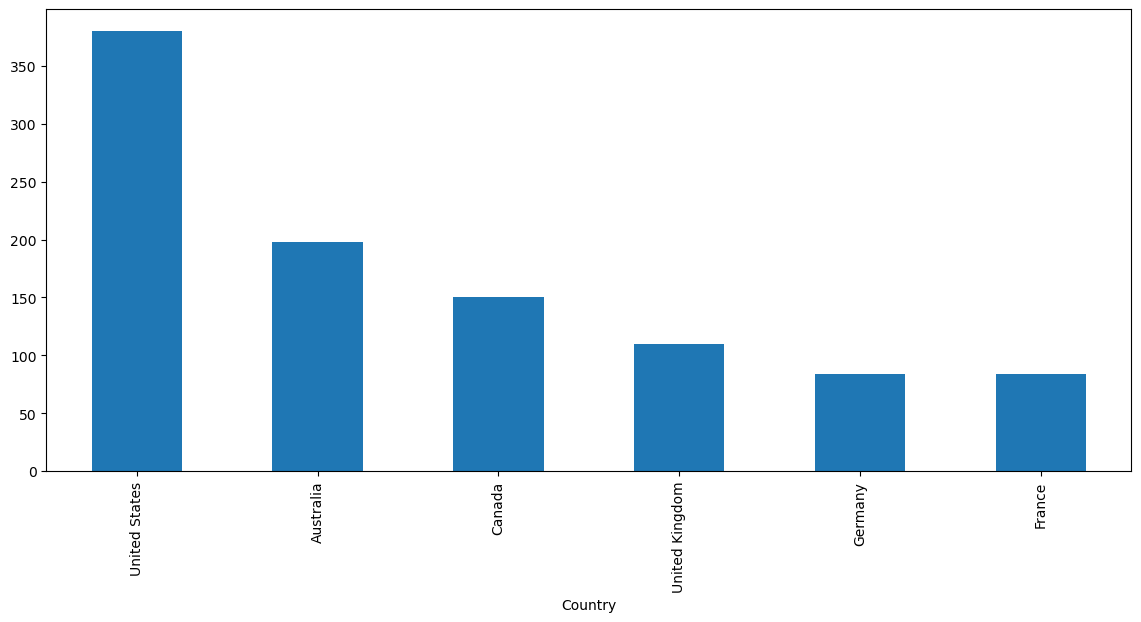

In [17]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14, 6))

# Question 5: Create a list of every products that has been sold 

In [18]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand'], dtype=object)

# Lets create bar plot to show 10 most sold products (best sellers):

<Axes: xlabel='Product'>

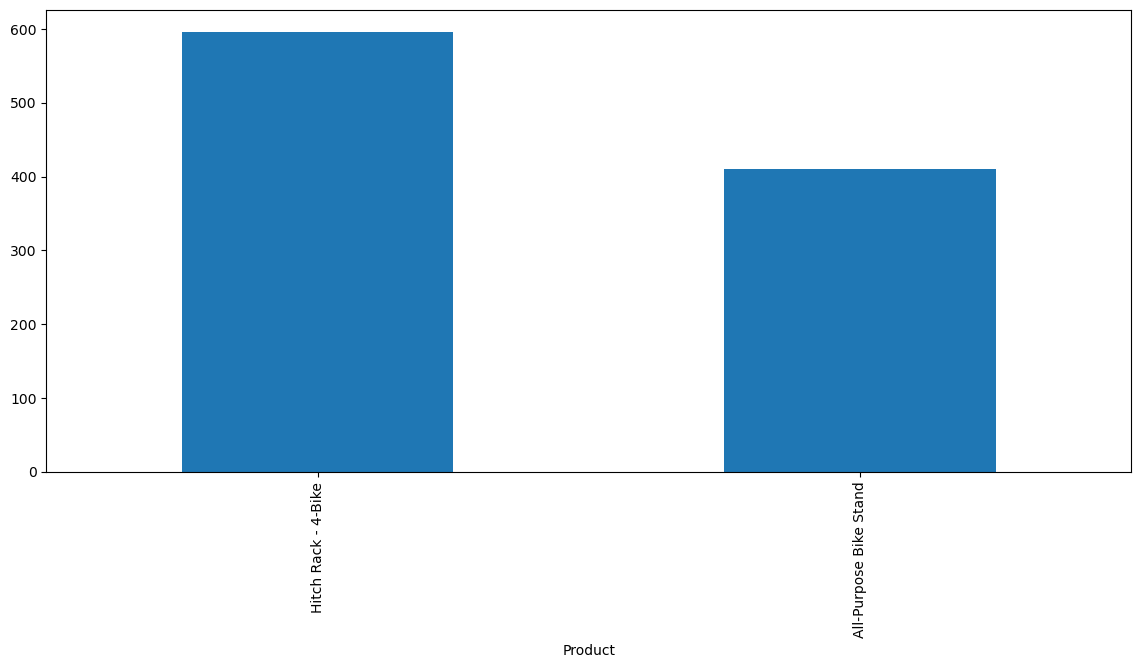

In [19]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14, 6))

# Lets see the relationship between Unit_Cost and Unit_Price

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

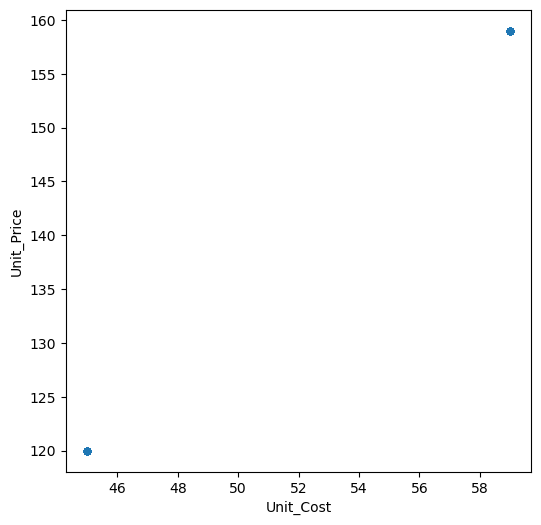

In [20]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6, 6))

# Lets see the relationship between Order_Quantity and Profit

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

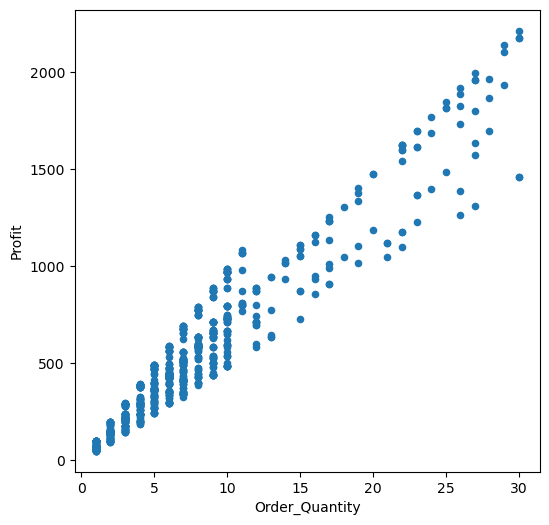

In [21]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6, 6))

# Lets see the relationship between Profit per Country

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

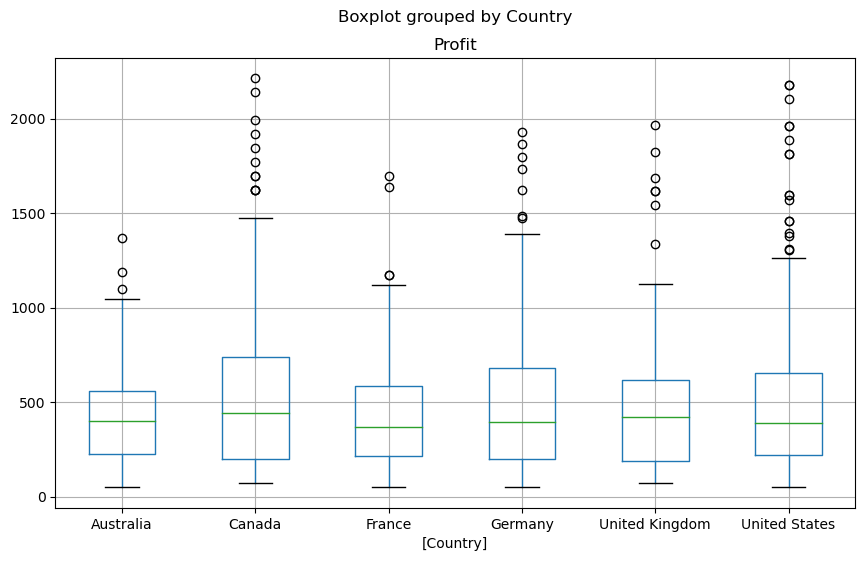

In [22]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10, 6))

# Lets see the Relationship between the Customer_Age per Country

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

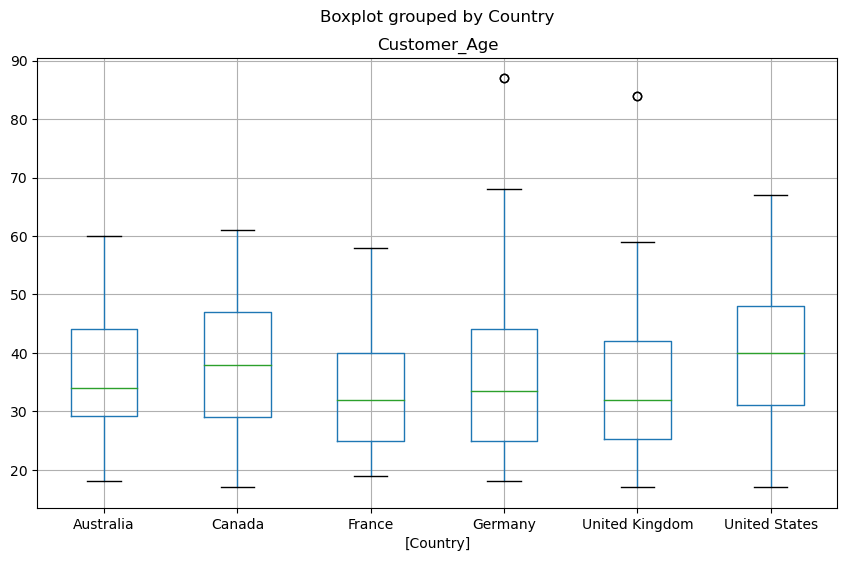

In [23]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10, 6))

# Add and Calculate a new Calculated_Date column using Day, Month, Year column(YYY-MM-DD)


In [24]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

# Parse Calculated_Date column into a datetime object


In [25]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

# How did sale evolve through the year? Show a a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis

<Axes: xlabel='Calculated_Date'>

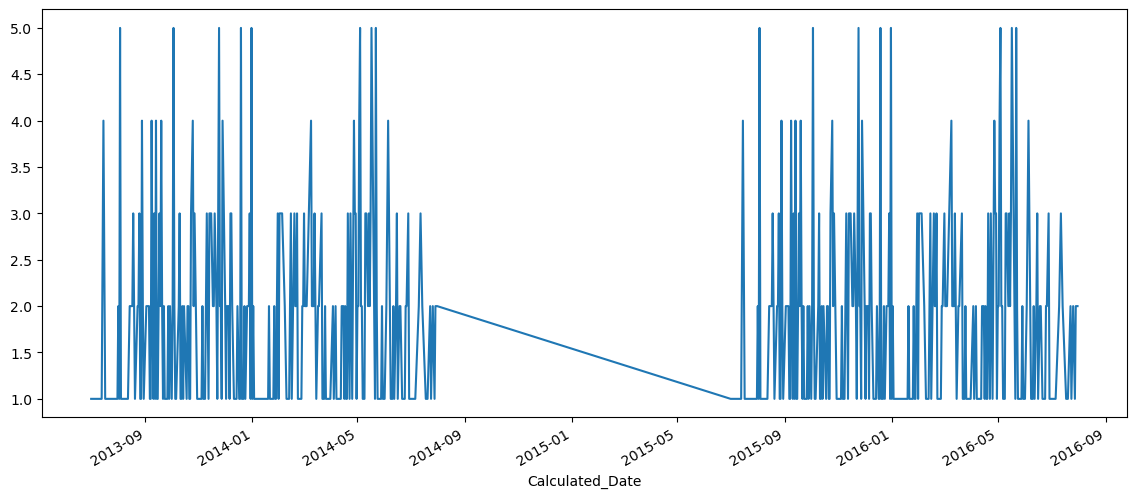

In [26]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14, 6))

# Increase $50 revenue to every sale

In [27]:
sales['Revenue'] += 50

# How many orders were made in Canada and France?

In [28]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

234

# How manny Bike Racks orders were made from Canada?

In [29]:
sales.loc[(sales['Country']== 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

# How manny orders were made in each region (state) of France?? And show the result on bar chart

In [30]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france_states

State
Seine (Paris)        18
Nord                 16
Seine Saint Denis    14
Yveline               8
Loiret                6
Hauts de Seine        6
Moselle               4
Essonne               4
Loir et Cher          2
Val d'Oise            2
Seine et Marne        2
Val de Marne          2
Name: count, dtype: int64

<Axes: xlabel='State'>

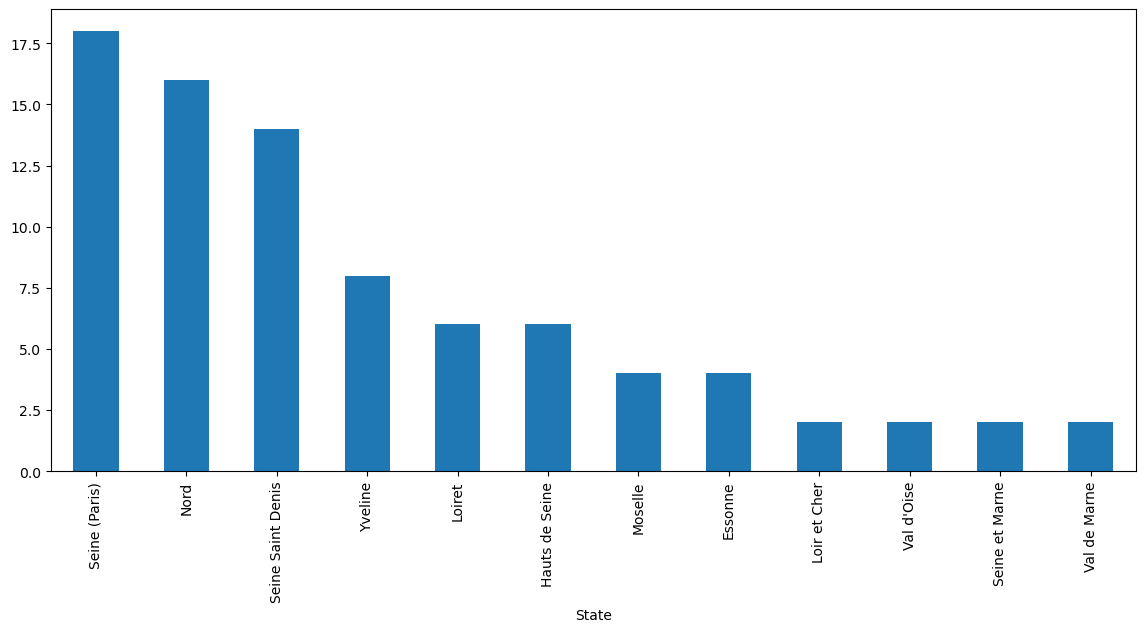

In [31]:
france_states.plot(kind='bar', figsize=(14, 6))

# How manny sales were made per category?

In [32]:
sales['Product_Category'].value_counts()

Product_Category
Accessories    1006
Name: count, dtype: int64

# Plot the number of the sales per category

<Axes: xlabel='Product_Category'>

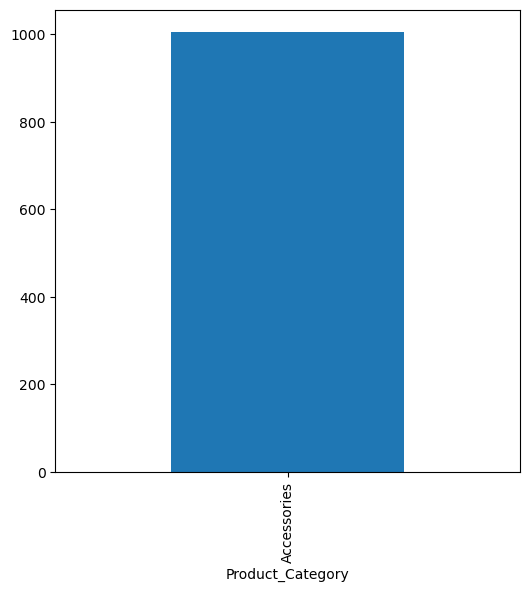

In [33]:
sales['Product_Category'].value_counts().plot(kind='bar', figsize=(6, 6))

# How manny order were made per accessory sub-category?

In [34]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories

Sub_Category
Bike Racks     592
Bike Stands    414
Name: count, dtype: int64

<Axes: xlabel='Sub_Category'>

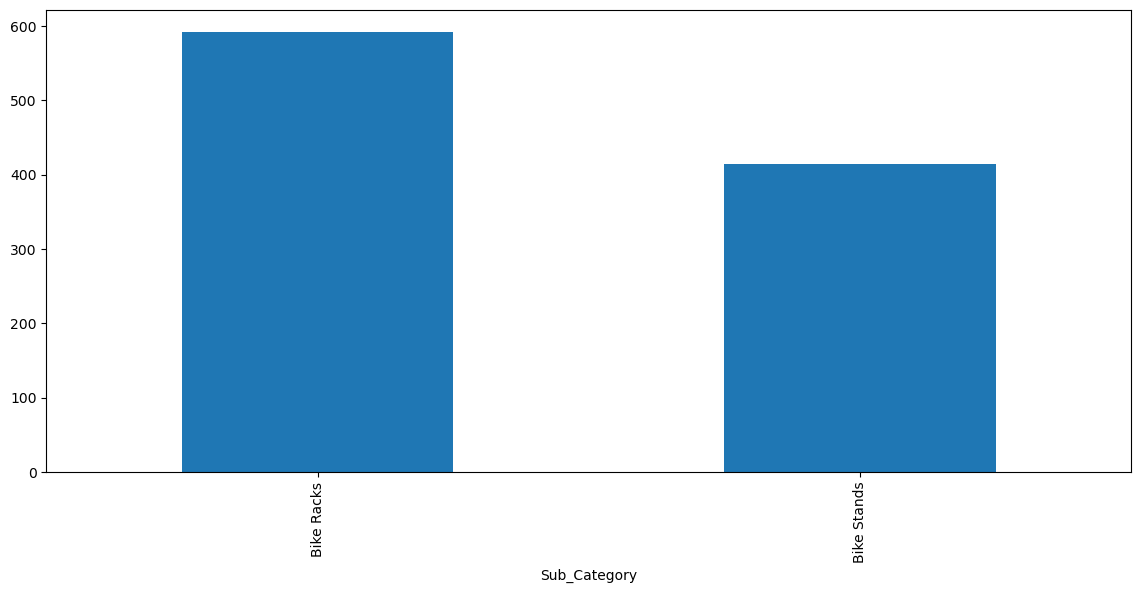

In [35]:
accessories.plot(kind='bar', figsize=(14, 6))

# How manny orders were per bike sub-categories?

In [36]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes

Series([], Name: count, dtype: int64)

<Axes: ylabel='count'>

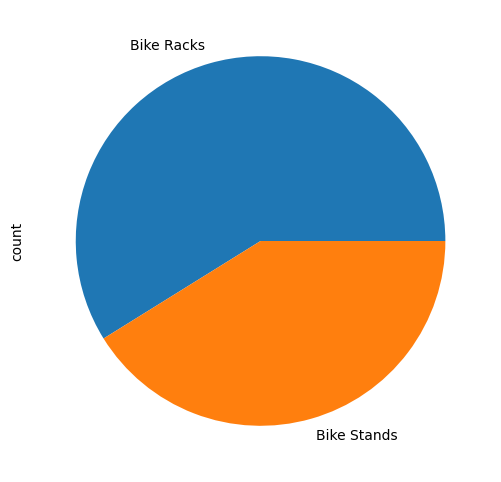

In [37]:
sales['Sub_Category'].value_counts().plot(kind='pie', figsize=(6,6))



 # Which gender has the most amount of sales?

In [38]:
sales['Customer_Gender'].value_counts()

Customer_Gender
M    508
F    498
Name: count, dtype: int64

<Axes: xlabel='Customer_Gender'>

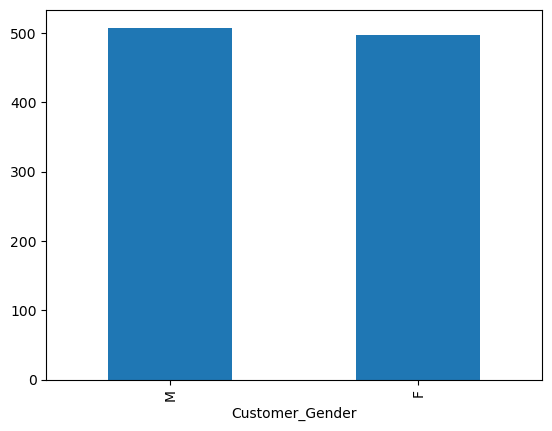

In [39]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

# How manny sales with more than 500 in Revenue we made by men

In [40]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

0

# Get the top-5 sales with the highest revenue

In [41]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30,45,120,2214,1350,3614,2016-01-07
182,2014-01-17,17,January,2014,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30,45,120,2178,1350,3578,2014-01-17
90,2014-02-12,12,February,2014,46,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30,45,120,2178,1350,3578,2014-02-12
244,2014-01-07,7,January,2014,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,29,45,120,2140,1305,3495,2014-01-07
183,2016-01-17,17,January,2016,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,29,45,120,2105,1305,3460,2016-01-17


# Get the sale with the highest Revenue 

In [42]:
cond = sales['Revenue'] == sales['Revenue'].max()
sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30,45,120,2214,1350,3614,2016-01-07


# What is the mean Order_Quantity of orders with more than 10k in revenue?

In [43]:
cond = sales['Revenue'] > 10_000
sales.loc[cond, 'Order_Quantity'].mean()

nan

# What is the mean Orders_Quantity of orders with less than 10k in revenue?

In [44]:
cond = sales['Revenue'] < 10_000
sales.loc[cond, 'Order_Quantity'].mean()

6.8717693836978135

# How manny orders were made in May of 2016?

In [45]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[cond].shape[0]

60

In [46]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))
sales.loc[cond].shape[0]

119

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

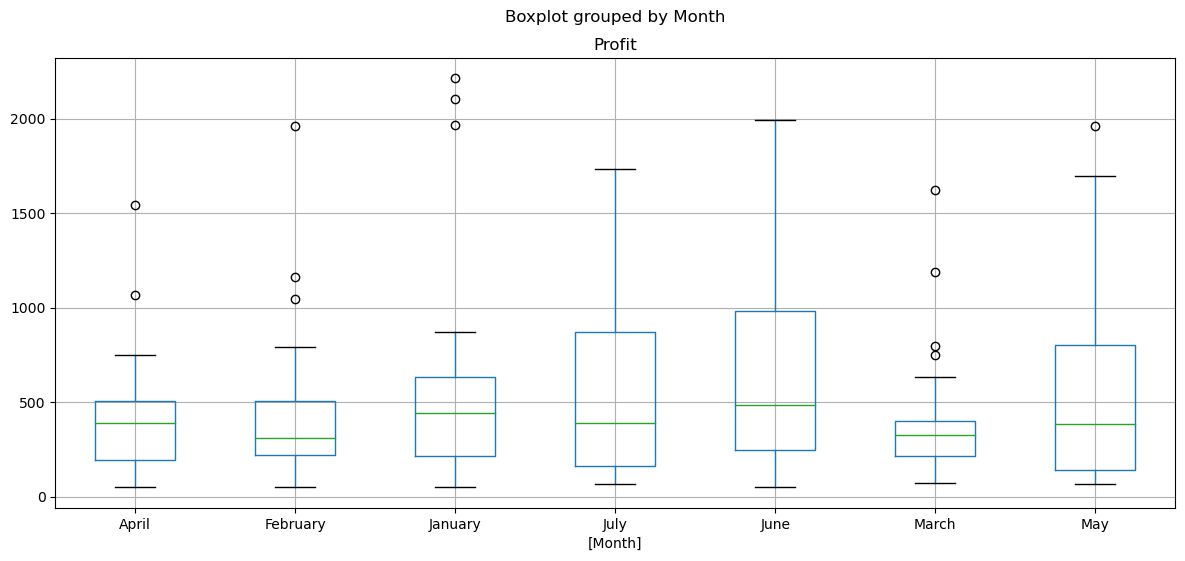

In [57]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14, 6))

In [ ]:
# Add 1.03% TAX on every sale Unit_Price within United States

In [86]:
sales.loc[sales['Country'] == 'United_States', 'Unit_Price'] *= 1


In [87]:
sales['Unit_Price'].head()

0    6.381635
1    6.381635
2    6.381635
3    6.381635
4    6.381635
Name: Unit_Price, dtype: float64

In [88]:
sales['Unit_Price'] *= 1.03

In [98]:
sales['Unit_Price'].head()

0    6.573084
1    6.573084
2    6.573084
3    6.573084
4    6.573084
Name: Unit_Price, dtype: float64

In [99]:
sales.loc[sales['Age_Group']== 'Adults (35-64)', 'Revenue'].mean()

929.5594795539033